In [1]:
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, UpSampling2D

model = Sequential ([
    Conv2D(16, (3,3), strides=(1,1), padding="SAME",input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Activation('relu'),
    Conv2D(32, (3,3), strides=(1,1), padding="SAME"),
    MaxPooling2D((2,2)),
    Activation('relu'),
    
    UpSampling2D((2,2)),
    Conv2D(32,(3,3), strides=(1,1), padding="SAME"),
    Activation('relu'),
    UpSampling2D((2,2)),
    Conv2D(16,(3,3), strides=(1,1), padding="SAME"),
    Activation('relu'),
    Conv2D(1,(3,3), strides=(1,1), padding="SAME"),
    Activation('relu')
])

In [20]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
activation_20 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
activation_21 (Activation)   (None, 7, 7, 32)          0         
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [0]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = "mean_squared_error", optimizer=optimizer)

In [0]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops 
#training when it won't improve anymore
early_stopping = EarlyStopping(patience=3)

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_train= x_train/255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_test = x_test/255.0

In [29]:
model.fit(x_train, x_train,shuffle=True, epochs=30, callbacks=[early_stopping])

Epoch 1/30
60000/60000 [==============================] - 22s 372us/step - loss: 0.0039
Epoch 2/30
  544/60000 [..............................] - ETA: 18s - loss: 0.0022

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 19s 317us/step - loss: 0.0019
Epoch 3/30
60000/60000 [==============================] - 19s 318us/step - loss: 0.0016
Epoch 4/30
60000/60000 [==============================] - 19s 317us/step - loss: 0.0014
Epoch 5/30
60000/60000 [==============================] - 19s 316us/step - loss: 0.0013
Epoch 6/30
60000/60000 [==============================] - 19s 317us/step - loss: 0.0012
Epoch 7/30
60000/60000 [==============================] - 19s 316us/step - loss: 0.0012
Epoch 8/30
60000/60000 [==============================] - 19s 316us/step - loss: 0.0011
Epoch 9/30
60000/60000 [==============================] - 19s 317us/step - loss: 0.0011
Epoch 10/30
60000/60000 [==============================] - 19s 317us/step - loss: 0.0010
Epoch 11/30
60000/60000 [==============================] - 19s 316us/step - loss: 9.9250e-04
Epoch 12/30
60000/60000 [==============================] - 19s 315us/step - loss: 9.6835e-04
Epoch 13/30
60000/60000 [=======

In [30]:
print("loss is {}".format(model.evaluate(x_test,x_test)))

10000/10000 [==============================] - 1s 91us/step
loss is 0.0007859534217976034


In [0]:
predictions = model.predict(x_test)

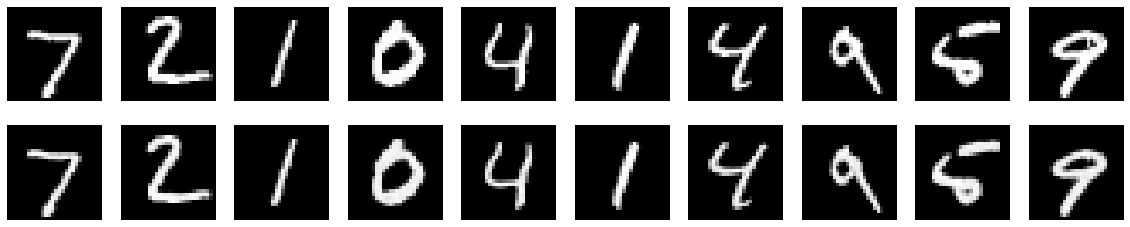

In [32]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
model.save("model_autoencoder_convolution.h5")

In [0]:

from google.colab import files
files.download("model_autoencoder_convolution.h5")